Part 1 ‐ Exploratory data analysis

In [1]:
import pandas as pd

/Anaconda/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df_logins = pd.read_json('logins.json')

In [3]:
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df_logins_grouped = df_logins.groupby(pd.Grouper(key='login_time', freq='15T')).size().to_frame()

In [6]:
df_logins_grouped.columns=['count']

In [7]:
df_logins_grouped.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


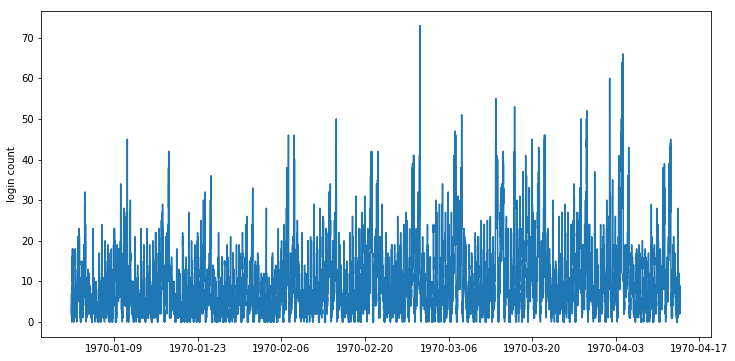

In [8]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))


plt.plot(df_logins_grouped)
plt.ylabel('login count')

plt.show()

%matplotlib inline
plt.style.use('classic')

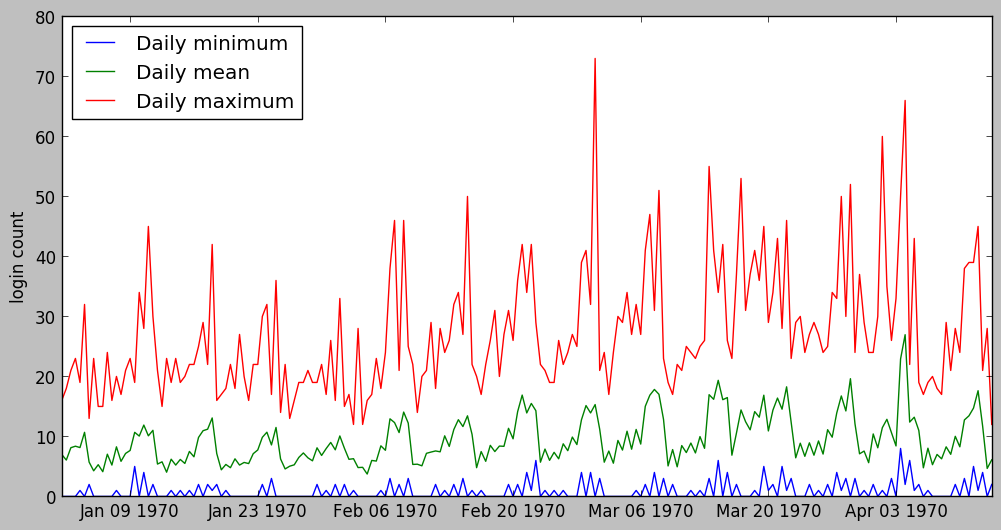

In [9]:

min_daily = df_logins_grouped.resample('12H').min()
mean_daily = df_logins_grouped.resample('12H').mean()
max_daily = df_logins_grouped.resample('12H').max()

plt.figure(figsize=(12,6))
plt.plot(min_daily, label='Daily minimum')
plt.plot(mean_daily, label ='Daily mean')
plt.plot(max_daily, label='Daily maximum')
plt.legend(loc='best')
plt.ylabel('login count')
plt.show()

The 12 hour maximum and mean login counts show a cyclic pattern. To look at the pattern more closely, smaller segment 
of data was plotted.

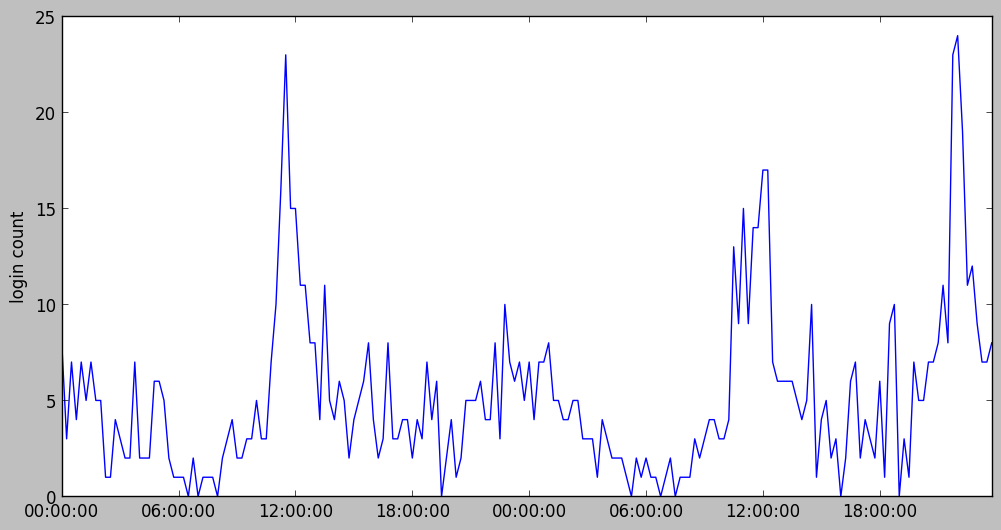

In [10]:
plt.figure(figsize=(12,6))


plt.plot(df_logins_grouped['1970-01-05':'1970-01-06'])
#plt.plot(df_logins_grouped['1970-01-02':'1970-01-03'])
plt.ylabel('login count')

plt.show()




The plot above shows that the login count increases around mid-day and decreases towards evening hours. It again increases 
towards midnight hours.

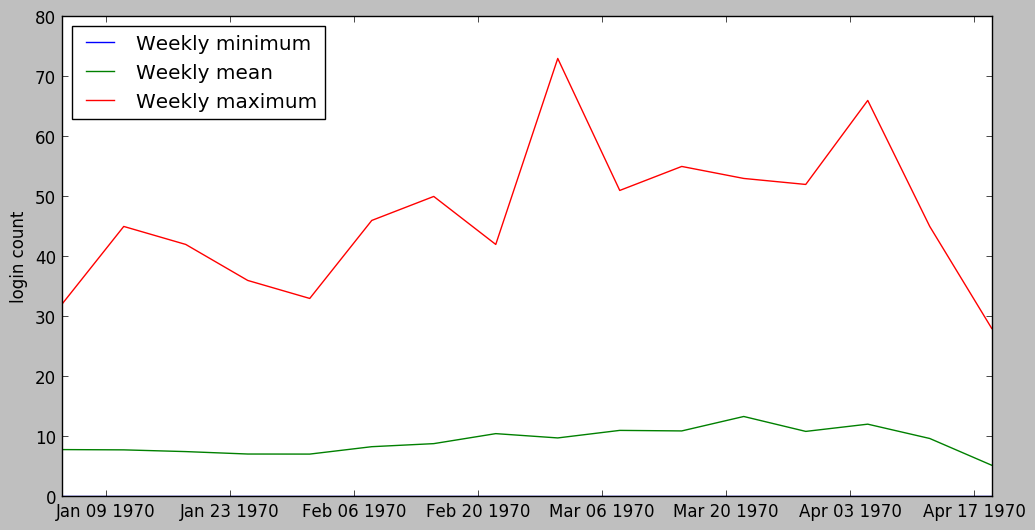

In [11]:
min_wkly = df_logins_grouped.resample('W').min()
mean_wkly = df_logins_grouped.resample('W').mean()
max_wkly = df_logins_grouped.resample('w').max()

plt.figure(figsize=(12,6))
plt.plot(min_wkly, label='Weekly minimum')
plt.plot(mean_wkly, label = 'Weekly mean')
plt.plot(max_wkly, label = 'Weekly maximum')
plt.legend(loc='best')
plt.ylabel('login count')
plt.show()

The plot shows that the login count increased in late february and early April.

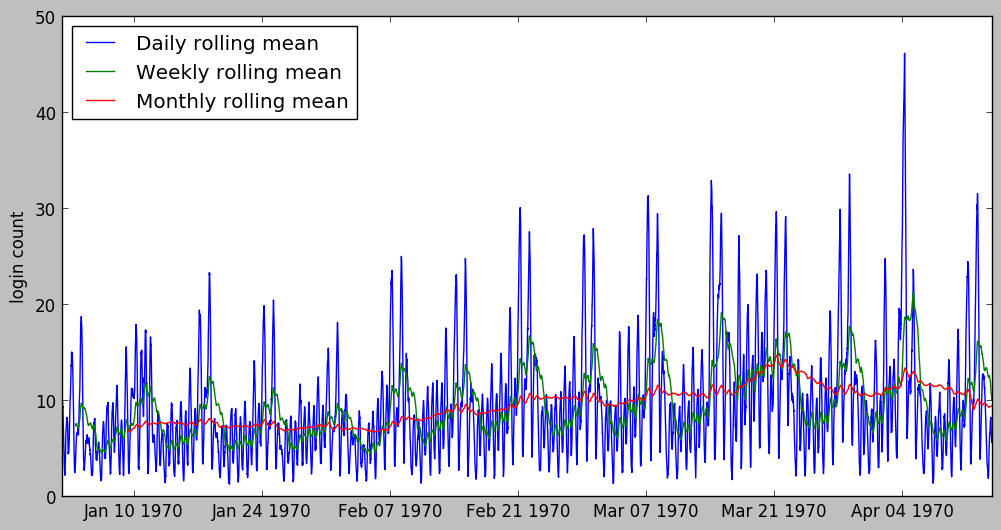

In [12]:
min_wkly = df_logins_grouped.rolling(window=24).mean()
mean_wkly = df_logins_grouped.rolling(window=24*7).mean()
max_wkly = df_logins_grouped.rolling(window=24*30).mean()

plt.figure(figsize=(12,6))
plt.plot(min_wkly, label='Daily rolling mean')
plt.plot(mean_wkly, label='Weekly rolling mean')
plt.plot(max_wkly, label= 'Monthly rolling mean')
plt.ylabel('login count')
plt.legend(loc='best')
plt.show()

The rolling averages show that the time series fairly stationary. There is a slight increased login activty in middle march.

Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


1. The key measure of success would be change in number of trips between two cities after implementation of reimbursement. If there is increase in the trips, 
   the experiment is a success.
    
2. A simple comparison of mean of number of trips between the cities before and after the toll reimbursement
   would be an experiment. z-score calculated from each sample sould serve as the measure of significance of difference of means
  if a significant difference is found, the toll reimbursements can be interpreted as good idea.
